In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics

In [256]:
"""Odczyt danych"""
titanic_tsv_mess = open(r"C:\Users\Irakli\Desktop\TitanicMess.tsv")
dataset = pd.read_csv(titanic_tsv_mess, delimiter="\t")
"""Werifikacja poprawnośći danych"""
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S,Titanic
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S,Titanic
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,"8,4583",NaN,Q,Titanic
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,"51,8625",E46,S,Titanic
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,"21,075",NaN,S,Titanic
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,"11,1333",NaN,S,Titanic
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,"30,0708",NaN,C,Titanic


In [257]:
"""Sprawdzania czy występują pustę wartości w zbiorze"""
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
ship             0
dtype: int64

<AxesSubplot:>

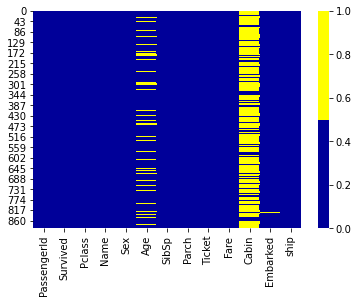

In [259]:
"""Wizualizacja brakujących danych"""
colours = ['#000099', '#ffff00']
sns.heatmap(dataset[dataset.columns].isnull(), cmap=sns.color_palette(colours))

In [260]:
"""Sprawdzamy kształt danych"""
dataset.shape

(892, 13)

In [261]:
for col in dataset.columns:
    pct_missing = np.mean(dataset[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


PassengerId - 0%
Survived - 0%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 19%
SibSp - 0%
Parch - 0%
Ticket - 0%
Fare - 0%
Cabin - 77%
Embarked - 0%
ship - 0%


In [262]:
"""Sprawdzamy czy w kolumnie Cabin brakuje wiecej wartośći niż 75 % jeżeli tak to odrzucamy"""
to_drop = ['Cabin']
dataset.drop(columns=to_drop, inplace=True)

In [263]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",S,Titanic
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C,Titanic
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",S,Titanic
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",S,Titanic
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",S,Titanic


In [264]:
"""sprawdzamy jeszcze raz wartości puste"""
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
ship             0
dtype: int64

In [304]:
"""Czyscimy dane z pustych wartośći"""
dataset.dropna(inplace=True)

In [305]:
dataset.Age.isnull().sum()

0

In [306]:
"""Sprawdzamy kształt danych"""
dataset.shape


(692, 12)

In [178]:
"""Zapisujemy dane oczysczone"""
f = open(r"C:\Users\Irakli\Desktop\TitanicCleaned.tsv", "w")
f.write(dataset.to_csv())
f.close()